# Predict house prices

In [1]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

In [10]:
train_data = pd.read_csv('../prep_data/prep_train.csv', index_col='Id')
train_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,
1,0.067355,RL,-0.216437,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,-0.359740,-0.103366,-0.286041,-0.060447,-0.089623,-1.553332,0.157449,WD,Normal,0.445322
2,-0.873272,RL,-0.069108,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,-0.359740,-0.103366,-0.286041,-0.060447,-0.089623,-0.447384,-0.602948,WD,Normal,-0.165484
3,0.067355,RL,0.142276,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,-0.359740,-0.103366,-0.286041,-0.060447,-0.089623,1.027214,0.157449,WD,Normal,0.700857
4,0.302511,RL,-0.075514,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3.873564,-0.103366,-0.286041,-0.060447,-0.089623,-1.553332,-1.363345,WD,Abnorml,0.383256
5,0.067355,RL,0.527891,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,-0.359740,-0.103366,-0.286041,-0.060447,-0.089623,2.133162,0.157449,WD,Normal,1.908005


In [11]:
test_data = pd.read_csv('../prep_data/prep_test.csv', index_col='Id')
test_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,
1461,-0.873272,RH,0.189933,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,-0.35974,-0.103366,1.849478,-0.060447,-0.089623,-0.078735,1.678244,WD,Normal,-1.420487
1462,-0.873272,RL,0.528788,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,-0.35974,-0.103366,-0.286041,-0.060447,21.936890,-0.078735,1.678244,WD,Normal,0.052469
1463,0.067355,RL,0.472803,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,-0.35974,-0.103366,-0.286041,-0.060447,-0.089623,-1.184683,1.678244,WD,Normal,0.343520
1464,0.067355,RL,-0.020682,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,-0.35974,-0.103366,-0.286041,-0.060447,-0.089623,-0.078735,1.678244,WD,Normal,0.282760
1465,1.478294,RL,-0.657781,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,-0.35974,-0.103366,2.276582,-0.060447,-0.089623,-1.921981,1.678244,WD,Normal,-0.106704


In [12]:
train_target = pd.read_csv('../prep_data/prep_target.csv', index_col='Id')
train_target.head()

,SalePrice
Id,
1,12.247694
2,12.109011
3,12.317167
4,11.849398
5,12.429216


In [13]:
cat_cols = train_data.dtypes[train_data.dtypes == 'object'].index

In [ ]:
# selected_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 
#                  'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'TotalSF']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.2, random_state=2021)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

Distributions of the y_train and y_test are quite the same

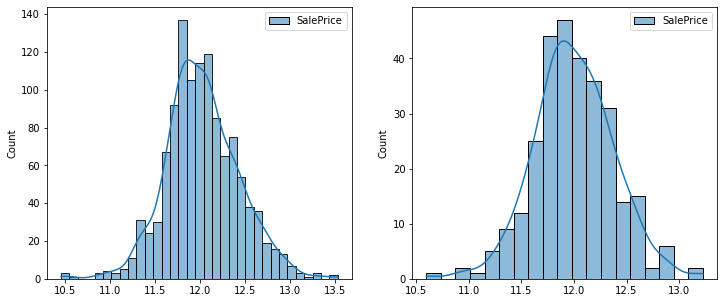

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(y_train, ax=ax1, kde=True);
sns.histplot(y_test, ax=ax2, kde=True);

## observe train and test set target variable distributions

In [18]:
model = CatBoostRegressor()
model.fit(X_train, y_train, cat_features=cat_cols, verbose=100)

Learning rate set to 0.040112
0:	learn: 0.3940690	total: 67.1ms	remaining: 1m 7s
100:	learn: 0.1187020	total: 1.83s	remaining: 16.3s
200:	learn: 0.0962736	total: 3.65s	remaining: 14.5s
300:	learn: 0.0855582	total: 5.45s	remaining: 12.6s
400:	learn: 0.0782852	total: 7.32s	remaining: 10.9s
500:	learn: 0.0722904	total: 9.08s	remaining: 9.04s
600:	learn: 0.0667563	total: 11s	remaining: 7.29s
700:	learn: 0.0622645	total: 12.7s	remaining: 5.42s
800:	learn: 0.0583385	total: 14.4s	remaining: 3.59s
900:	learn: 0.0545758	total: 16.3s	remaining: 1.79s
999:	learn: 0.0511365	total: 18.1s	remaining: 0us


In [19]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mse(y_test, y_pred))
print(f"Root mean squared error is: {rmse}")

Root mean squared error is: 0.10862221767122968


Our first score is about **10%** from the mean price which is **normal**

In [24]:
rmse / y_test.mean()

SalePrice    0.009051
dtype: float64

In [21]:
y_pred = model.predict(test_data)

In [41]:
importances = {}

for score, col in zip(model.get_feature_importance(), X_train.columns):
    importances[col] = score
    
# print top 10 features
sorted(importances.items(), key=lambda x: x[1], reverse=True)[:10]

[('TotalSF', 20.144169782891577),
 ('OverallQual', 13.494387054653078),
 ('GrLivArea', 6.502163603477642),
 ('ExterQual', 3.833586421035224),
 ('YearBuilt', 3.6404798998358285),
 ('1stFlrSF', 2.8371252405054106),
 ('OverallCond', 2.804137471312043),
 ('GarageCars', 2.759158504047089),
 ('MSZoning', 2.6663353968166454),
 ('LotArea', 2.6617729052196513)]

In [43]:
!pip install shap

     |████████████████████████████████| 356 kB 1.6 MB/s eta 0:00:01
  Using cached tqdm-4.61.0-py2.py3-none-any.whl (75 kB)
  Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
  Created wheel for shap: filename=shap-0.39.0-cp38-cp38-linux_x86_64.whl size=502584 sha256=6804761836ed21a0dfa4bd2d81dec00e769ba2715027c40a0d34474525ff1f55
  Stored in directory: /home/qazybek/.cache/pip/wheels/3d/c9/06/734ed80d6d61fad331974bf62017b4ea6b33488082b9f5e67e
Successfully built shap


In [44]:
import shap

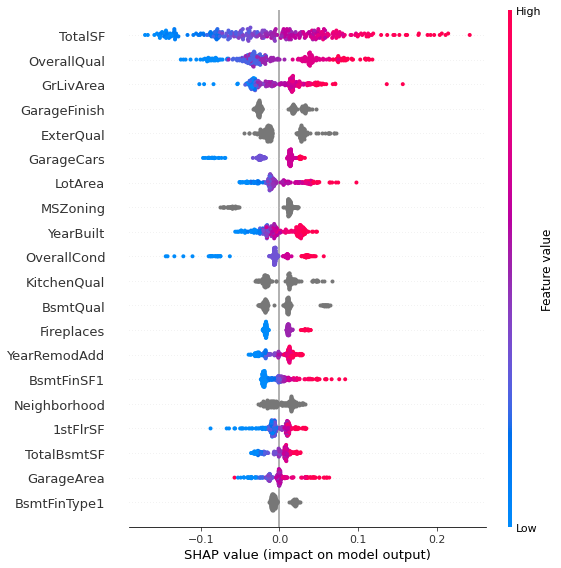

In [46]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

Following features according to SHAP summary plot have great impact on model:
- `GarageArea`
- `TotalBsmtSF`
- `1stFlrSF`
- `BsmtFinSF1`
- `YearRemodAdd`
- `YearBuilt`
- `LotArea`
- `GrLivArea`
- `GarageCars`
- `OverallQual`
- `TotalSF`

---

As we have previously mentioned(in the eda.ipynb) mainly features with high correlation with target variable will have greater impact.\
However, we see that there are many other features which have contributed to model performance. 

In [22]:
# my_submission = pd.DataFrame({'Id': test_data.index, 'SalePrice': y_pred})
# my_submission.to_csv('../submission/submission3.csv', index=False)

In [23]:
# model.save_model(fname='../submission/model3')